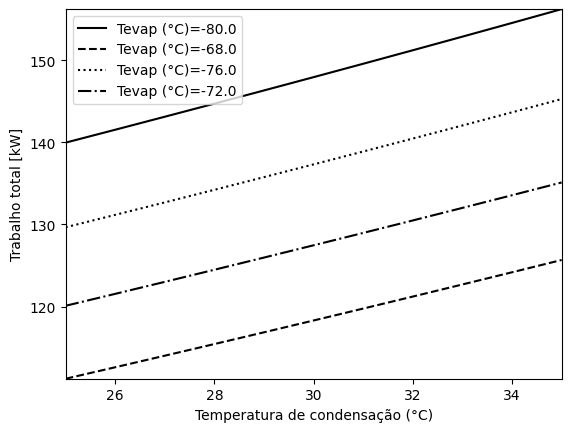

In [3]:
from CoolProp.CoolProp import PropsSI as COOLPROP
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Listas
T1_lista = []
T10_lista = []
Wcomp_total_lista = []
COP_lista = []
cont = []

#Lista de temperaturas de condensação
for i in range (25, 36, 1):
    cont.append(i+273.15)

#Dados do problema
Pfrig = 120 * 1000 #[W]
T4 = -24 + 273.15 #[K]
T12 = -29 + 273.15 #[K]
fluid_high = 'R600'
fluid_low = 'R170'
N = 0.7
drop_suc = 0 #[Pa]
drop_desc = 0 #[Pa]
efet = 0.7 #efetividade do trocador intermediário
DeltaT = 0

#Pressão crítica do fluido superior
P_crit_high = COOLPROP('PCRIT', fluid_high)

#Ciclo inferior
P4 = COOLPROP('P', 'T', T4, 'Q', 0, fluid_low)
P5 = P4
cp4 = COOLPROP('CP0MASS', 'T', T4, 'Q', 0, fluid_low)
h4 = COOLPROP('H', 'T', T4, 'Q', 0, fluid_low)

#Ciclo superior
P12 = COOLPROP('P', 'T', T12, 'Q', 0.3, fluid_high)
P7 = P12
T7 = COOLPROP('T', 'P', P7, 'Q', 1, fluid_high)
h7 = COOLPROP('H', 'T', T7, 'Q', 1, fluid_high)
cp7 = COOLPROP('CP0MASS', 'T', T7, 'Q', 1, fluid_high)


#Loop nos dois ciclos - variação das temperaturas de evaporação e condensação
for T1 in range (-80, -67, 4):
    #Ciclo inferior
    T1 = T1 + 273.15
    cp1 = COOLPROP('CP0MASS', 'T', T1, 'Q', 1, fluid_low)
    P1 = COOLPROP('P', 'T', T1, 'Q', 1, fluid_low)
    h1 = COOLPROP('H', 'T', T1, 'Q', 1, fluid_low)
    P2 = P1
    #Comparação entre os calores específicos nos pontos 4 e 1
    if cp1 < cp4:
        T2 = efet * (T4 - T1) + T1
        h2 = COOLPROP('H', 'T', T2, 'P', P2, fluid_low)
        ha = h2
        Pa = P2 - drop_suc
        Ta = COOLPROP('T', 'H', ha, 'P', Pa, fluid_low)
        Pb = Pa
        Tb = Ta + DeltaT
        hb = COOLPROP('H', 'P', Pb, 'T', Tb, fluid_low)
        sb = COOLPROP('S', 'P', Pb, 'T', Tb, fluid_low)
        P3 = P4
        Pc = P3 + drop_desc
        h5 = h4 + h1 - h2
        T5 = COOLPROP('T', 'H', h5, 'P', P5, fluid_low)
        h6 = h5
    else:
        T5 = T4 - efet * (T4 - T1)
        h5 = COOLPROP('H', 'T', T5, 'P', P5, fluid_low)
        h2 = h4 + h1 - h5
        T2 = COOLPROP('T', 'H', h2, 'P', P2, fluid_low)
        ha = h2
        Pa = P2 - drop_suc
        Ta = COOLPROP('T', 'H', ha, 'P', Pa, fluid_low)
        Pb = Pa
        Tb = Ta + DeltaT
        hb = COOLPROP('H', 'P', Pb, 'T', Tb, fluid_low)
        sb = COOLPROP('S', 'P', Pb, 'T', Tb, fluid_low)
        P3 = P4
        Pc = P3 + drop_desc
        h6 = h5
    m_flow_low = Pfrig / (h1 - h6)
    P3 = P4
    Pc = P3 + drop_desc
    sc_ideal = sb
    hc_ideal = COOLPROP('H', 'P', Pc, 'S', sc_ideal, fluid_low)
    hc_real = (hc_ideal - hb)/N + hb
    h3 = hc_real
    #Trabalho específico do compressor do ciclo inferior
    w_low = hc_real - hb
    #Trabalho do compressor do ciclo inferior
    Wcomp_low = m_flow_low * w_low
    #Calor trocado no trocador central
    Qcond_low =  m_flow_low * (h3 - h4)
    for T10 in cont:
        #Ciclo superior
        Qevap_high = Qcond_low
        P10 = COOLPROP('P', 'T', T10, 'Q', 0, fluid_high)
        cp10 = COOLPROP('CP0MASS', 'T', T10, 'Q', 0, fluid_high)
        h10 = COOLPROP('H', 'T', T10, 'Q', 0, fluid_high)
        P8 = P7
        P11 = P10
        
        #Comparação entre os calores específicos nos pontos 10 e 7
        if cp7 < cp10:
            T8 = efet * (T10 - T7) + T7
            h8 = COOLPROP('H', 'T', T8, 'P', P8, fluid_high)
            hw = h8
            Pw = P8 - drop_suc
            Tw = COOLPROP('T', 'H', hw, 'P', Pw, fluid_high)
            Px = Pw
            Tx = Tw + DeltaT
            hx = COOLPROP('H', 'P', Px, 'T', Tx, fluid_high)
            sx = COOLPROP('S', 'P', Px, 'T', Tx, fluid_high)
            
            P9 = P10
            Py = P9 + drop_desc
            sy_ideal = sx
            hy_ideal = COOLPROP('H', 'P', Py, 'S', sy_ideal, fluid_high)
            hy_real = (hy_ideal - hx)/N + hx
            h9 = hy_real
        
            h11 = h10 + h7 - h8
            T11 = COOLPROP('T', 'H', h11, 'P', P11, fluid_high)
            h12 = h11
        else:
            T11 = T10 - efet * (T10 - T7)
            h11 = COOLPROP('H', 'T', T11, 'P', P11, fluid_high)
            h8 = h10 + h7 - h11
            T8 = COOLPROP('T', 'H', h8, 'P', P8, fluid_high)
            hw = h8
            Pw = P8 - drop_suc
            Tw = COOLPROP('T', 'H', hw, 'P', Pw, fluid_high)
            Px = Pw
            Tx = Tw + DeltaT
            hx = COOLPROP('H', 'P', Px, 'T', Tx, fluid_high)
            sx = COOLPROP('S', 'P', Px, 'T', Tx, fluid_high)
        
            P9 = P10
            Py = P9 + drop_desc
            sy_ideal = sx
            hy_ideal = COOLPROP('H', 'P', Py, 'S', sy_ideal, fluid_high)
            hy_real = (hy_ideal - hx)/N + hx
            h9 = hy_real
            h12 = h11
            
        r2 = P9/P8
        m_flow_high = Qevap_high / (h7 - h12)

        #Verificação da pressão crítica
        if P_crit_high > P9:
            T1_lista.append(T1 - 273.15)
            T10_lista.append(T10 - 273.15)
            #Trabalho específico no compressor do ciclo superior
            w_high = hy_real - hx
            #Trabalho no compressor do ciclo superior
            Wcomp_high = m_flow_high * w_high
            #Trabalho total
            Wcomp_total = Wcomp_low + Wcomp_high
            Wcomp_total_lista.append(Wcomp_total / 1000)
            #COP
            COP = Pfrig / Wcomp_total
            COP_lista.append(COP)
        else:
            print ('A pressão P9 = {:0.2f} kPa (T1 = {:0.2f}°C, T10 = {:0.2f}°C) é maior do que a ' 
            'pressão crítica do {} e, por isso, o ponto não foi incluído no gráfico'.format(P9/1000,T1-273.15,T10-273.15,fluid_high))

x = T10_lista
z = T1_lista
y = Wcomp_total_lista

# Define um dicionário que mapeia os valores de z para estilos de linha diferentes
z_linestyles = {z_val: linestyle for z_val, linestyle in zip(set(z), ['-','--', ':', '-.'])}

# Cria uma figura com um gráfico 2D
fig, ax = plt.subplots()

# Itera sobre os valores únicos de z
for z_val in set(z):
    # Seleciona os pontos correspondentes a z_val
    x_val = [x[i] for i in range(len(x)) if z[i] == z_val]
    y_val = [y[i] for i in range(len(y)) if z[i] == z_val]

    # Plota os pontos com uma linha ligando eles
    ax.plot(x_val, y_val, linestyle=z_linestyles[z_val], color='black', label=f'Tevap (°C)={z_val}')

# Define os limites dos eixos X e Y
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Define os rótulos dos eixos X e Y
ax.set_xlabel('Temperatura de condensação (°C)')
ax.set_ylabel('Trabalho total [kW]')

# Adiciona a legenda
ax.legend()


# Mostra o gráfico
plt.show()
